In [1]:
import numpy as np
import vibration_toolbox as vtb
%matplotlib notebook

In [2]:
x1, x2 = (1,1)
k = 0.05
alpha1 = 1
nu, beta = 0, 0

In [3]:
M = np.array([[1.0,0],
             [0,1.0]])
K = np.array([[1+k,-k],
             [-k,1+alpha1+k]])
C = nu*M + beta*K

In [7]:
sys = vtb.VibeSystem(M, C, K, name='2 dof system')

In [8]:
sys.wn

array([1.02347751, 1.43265271])

In [9]:
sys.wd

array([1.02347751, 1.43265271])

In [11]:
sys.evectors


array([[-9.67870316e-19-6.97987886e-01j,  7.24848497e-17+2.85115891e-02j,
         7.24848497e-17-2.85115891e-02j, -9.67870316e-19+6.97987886e-01j],
       [-9.77383631e-19-3.48125794e-02j,  6.74473385e-17-5.71653815e-01j,
         6.74473385e-17+5.71653815e-01j, -9.77383631e-19+3.48125794e-02j],
       [ 7.14374906e-01+0.00000000e+00j, -4.08472053e-02+1.05024058e-16j,
        -4.08472053e-02-1.05024058e-16j,  7.14374906e-01-0.00000000e+00j],
       [ 3.56298921e-02-1.65186204e-18j,  8.18981386e-01+0.00000000e+00j,
         8.18981386e-01-0.00000000e+00j,  3.56298921e-02+1.65186204e-18j]])

In [12]:
vtb.modes_system?

In [27]:
w, P, S, Sinv = vtb.modes_system_undamped(M,K)
S

array([[-0.99875853,  0.0498137 ],
       [-0.0498137 , -0.99875853]])

In [32]:
x0 = S[:,0].T
x0

array([-0.99875853, -0.0498137 ])

In [33]:
x0 = x0/10
x0

array([-0.09987585, -0.00498137])

In [35]:
x0 = x0*100
x0

array([-998.75852692,  -49.81370188])

In [28]:
K

array([[ 1.05, -0.05],
       [-0.05,  2.05]])

In [26]:
w

array([1.02347751, 1.43265271])

<IPython.core.display.Javascript object>


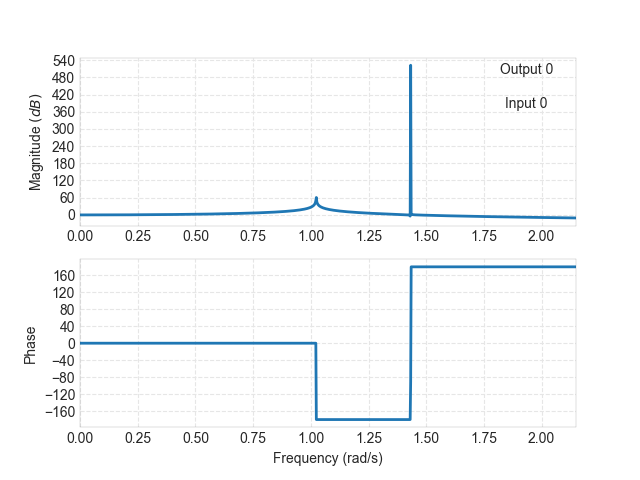

In [10]:
ax = sys.plot_freq_response(0,0)

In [11]:
sys.C = 20*C
sys.wd

array([1.02327269, 1.43232748])

<IPython.core.display.Javascript object>


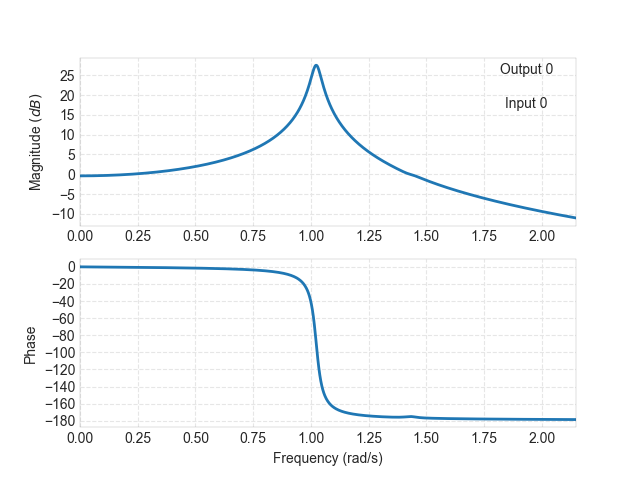

In [12]:
ax = sys.plot_freq_response(0,0)

<IPython.core.display.Javascript object>


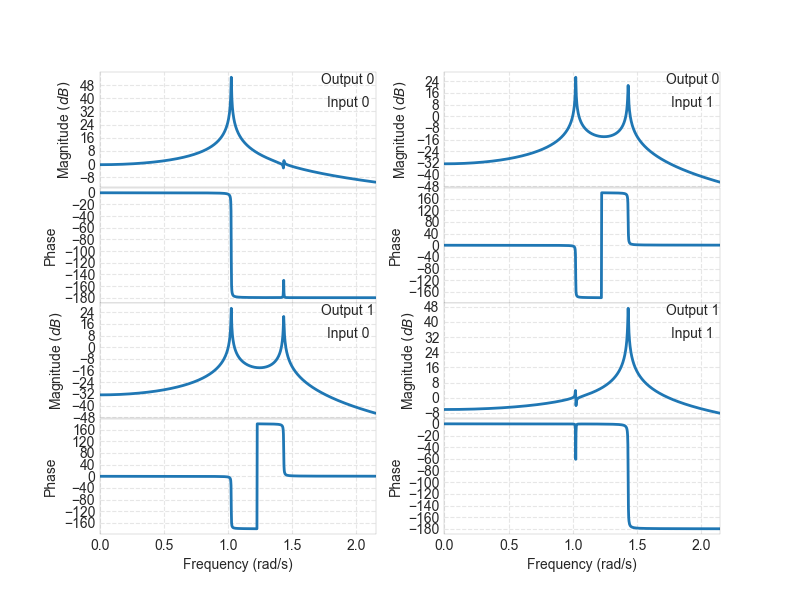

In [13]:
sys.C = C
axs = sys.plot_freq_response_grid([0,1],[0,1])

<IPython.core.display.Javascript object>


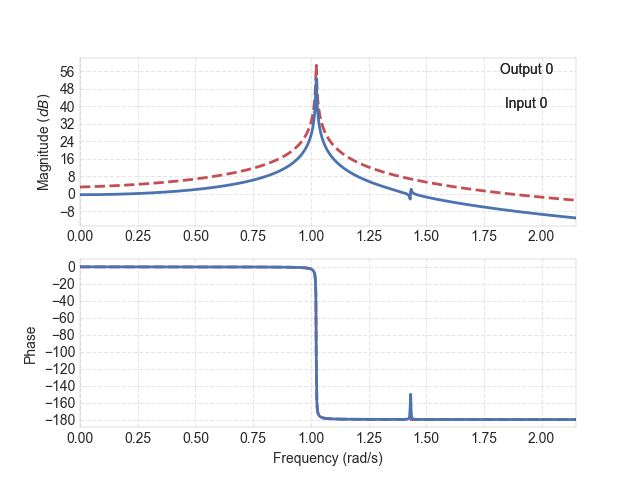

In [15]:
ax = sys.plot_freq_response(0,0, modes=[0.1, 0.005], color = 'r', linestyle = '--',
                          label ='Modes .1 and .005')
ax = sys.plot_freq_response(0,0, ax0=ax[0],ax1=ax[1],color='b',label='All modes')


In [4]:
>>> M = np.array([[1, 0],
...               [0, 1]])
>>> K = np.array([[2, -1],
...               [-1, 6]])
>>> C = np.array([[0.3, -0.02],
...               [-0.02, 0.1]])
>>> wn, wd, zeta, X, Y = vtb.modes_system(M, K, C)

Damping is non-proportional, eigenvectors are complex.


In [5]:
M

array([[1, 0],
       [0, 1]])

In [6]:
K

array([[ 2, -1],
       [-1,  6]])

In [7]:
vtb.modes_system_undamped?

In [13]:
omega_n, _, S, _ = vtb.modes_system_undamped(M, K)
print('natural frequencies = {}'.format(omega_n))
print('mode shapes = {}'.format(S))

natural frequencies = [1.32813103 2.49721204]
mode shapes = [[-0.97324899  0.22975292]
 [-0.22975292 -0.97324899]]


In [16]:
np.sqrt(np.diag(S.T@K@S))

array([1.32813103, 2.49721204])

Guess to be used near omega_1

In [18]:
print('Mode 1 is {}'.format(S[:,0]))

Mode 1 is [-0.97324899 -0.22975292]


Guess to be used near omega_2

In [19]:
print('Mode 2 is {}'.format(S[:,1]))

Mode 2 is [ 0.22975292 -0.97324899]
